# we start with a few assumptions:
* the dataset is balanced.
* as a first attempt, no transformations will be used other than resizing
* we will run the input through the pretrained network and extract features, without SSL


In [1]:
import torch
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
# from PIL import Image
import torch.nn as nn

* define a dataset, dataloader, and transforms to handle the data

In [2]:
means = [0, 0, 0]
stds = [1, 1, 1]
model_input_resolution = [224,224]

data_transforms = {
    'train': transforms.Compose([
        transforms.ToPILImage(mode='RGB'),
        transforms.ToTensor(),
        transforms.Resize(model_input_resolution),
        transforms.Normalize(means, stds)
    ]),
    'val': transforms.Compose([
        transforms.ToPILImage(mode='RGB'),
        transforms.ToTensor(),
        transforms.Resize(model_input_resolution),
        transforms.Normalize(means, stds)
    ]),
}

In [343]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file).astype({'label': 'long'})
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label, self.img_labels.iloc[idx, 0]

* here is the local path to the images on my machine, as well as the annotation file that holds file names and classes (arbitrarily set to 0 for train)

In [344]:
annotations = 'C:/Users/USER/Downloads/home_assigment_ver1/data/home_assignment/ver1/pangea_train_annotations.csv'
im_dir = 'C:/Users/USER/Downloads/home_assigment_ver1/data/home_assignment/ver1/train/'
train_data = CustomImageDataset(annotations, im_dir, data_transforms['train'])

annotations = 'C:/Users/USER/Downloads/home_assigment_ver1/data/home_assignment/ver1/pangea_test_annotations.csv'
im_dir = 'C:/Users/USER/Downloads/home_assigment_ver1/data/home_assignment/ver1/test/'
test_data = CustomImageDataset(annotations, im_dir, data_transforms['val'])

In [345]:
from torch.utils.data import DataLoader
dataloaders = {
    'train': DataLoader(train_data, batch_size=1, shuffle=True),
    'validation': DataLoader(test_data, batch_size=1, shuffle=False)
  }

In [346]:
# A helper function to show an image from a tensor. We need to restore it to the original dynamic range before normalization
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    fig = plt.figure(figsize=(5,3), dpi=300)
    plt.imshow(inp)
    if title is not None:
       plt.title(title, fontsize=5)
    plt.pause(0.001)  # pause a bit so that plots are updated

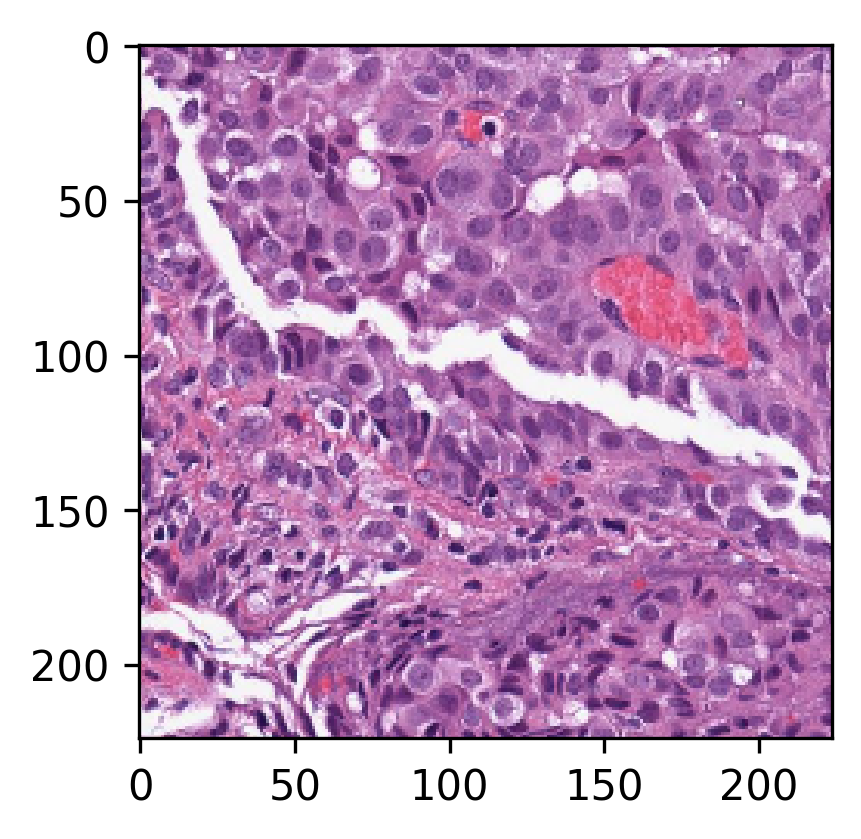

In [351]:
inputs, target, _ = next(iter(dataloaders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs, nrow=8)

imshow(out, title=None)

In [416]:
model=models.vgg19(pretrained=True)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [417]:
!pip install torchsummary 
from torchsummary import summary
summary(model, (3, 224, 224))


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [418]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

* we use a vgg19 model, pretrained on imagenet. we use the output of layer 29, however, it might be useful to try higher layers as well, as seen in the original publication.
* The original assumption was high layers are made for classification, but on the other hand might be too speciallized.
* This might be related to how similar is our task to the original task the model was trained for.

In [114]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG,self).__init__()
        # define selected layers
        self.req_features=['28']                                
        # drop higher layers
        self.model=models.vgg19(pretrained=True).features[:29] #model will contain the first 29 layers
    
   
    #x holds the input tensor(image) that will be feeded to each layer
    def forward(self,x):
        #initialize an array that wil hold the activations from the chosen layers
        features=[]
        #Iterate over all the layers of the model
        for layer_num,layer in enumerate(self.model):
            #activation of the layer will stored in x
            x=layer(x)
            #appending the activation of the selected layers and return the feature array
            if (str(layer_num) in self.req_features):
                features.append(x)
                
        return features
model=VGG()

In [352]:
inputs, target, _ = next(iter(dataloaders['train']))
feature_dims = np.prod(model(inputs)[0].detach().numpy().shape)
model(inputs)[0].detach().numpy().shape

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(1, 512, 14, 14)

In [353]:
feature_dims

100352

In [354]:
data = np.zeros([len(dataloaders['train']), feature_dims])
i=0
file_names = []
for input, label, file_name in dataloaders['train']:
    features = model(input)  
    data[i,:] = features[0].detach().numpy().flatten()
    file_names.append(file_name)
    i+=1
    print(i)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [355]:
print(data.shape)
d = data.flatten()
print(d[d!= 0].shape)

(2000, 100352)
(200704000,)


# normalize features

In [356]:
m = data.mean(axis=0, keepdims=True)
data = data - m
s = data.std(axis=0, keepdims=True)
data = data / s

In [357]:
# QC
print(data.max())
print(data.min())
print(data.mean())
print(data.std())

16.485011807815116
-14.342792286105377
-1.0150610510858575e-18
0.9999999999999963


# train KMeans

In [27]:
from sklearn.cluster import KMeans

In [358]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data)


In [359]:
train_pred = kmeans.predict(data)
print(train_pred.shape)
print(train_pred.sum())

(2000,)
973


# get validation features and predict

In [360]:
val_data = np.zeros([len(dataloaders['validation']), feature_dims])
i=0
labels = []
for input, label, _ in dataloaders['validation']:
    labels.append(label.item())
    features = model(input)  
    val_data[i,:] = features[0].detach().numpy().flatten()
    i+=1
    print(i)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


normalize using the train set mean and std

In [361]:
val_data = val_data - m
val_data = val_data / s

In [362]:
print(val_data.shape)
d = val_data.flatten()
print(d[d!= 0].shape)

(100, 100352)
(10035200,)


In [363]:
pred = kmeans.predict(val_data)

In [364]:
pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [365]:
true = np.array(labels)
true

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

* try to visualize "closeness" of data features using TSNE. this yields a non-deterministic result, that might be slightly better or worst each time.
* test data is labeled in tale and purple (according to true labels), train data in yellow. 

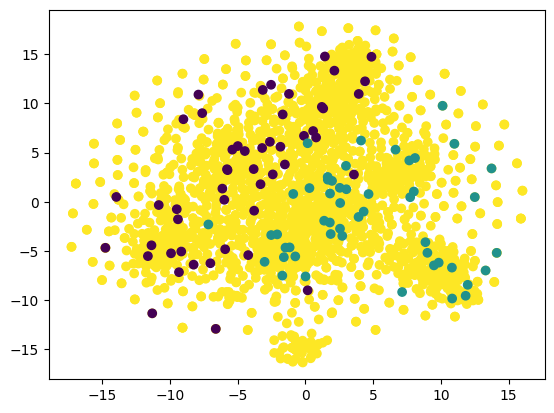

In [140]:
embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=100).fit_transform(np.concatenate([data, val_data]))
plt.scatter(embedded[:,0], embedded[:,1], c=np.concatenate([np.ones(2000)*2, true]))



In [366]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true, np.logical_not(pred))

array([[42,  8],
       [ 8, 42]], dtype=int64)

* the names are replaced, but the clustering are correct 84% of the times

# error analysis

In [367]:
error_list = []
f = iter(dataloaders['validation'])
for i in np.arange(100):
    image = next(f)
    if [true == pred][0][i]:
        error_list.append(image[0].detach().numpy())
error_list = torch.tensor(error_list).squeeze()

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [368]:
error_list.shape

torch.Size([16, 3, 224, 224])

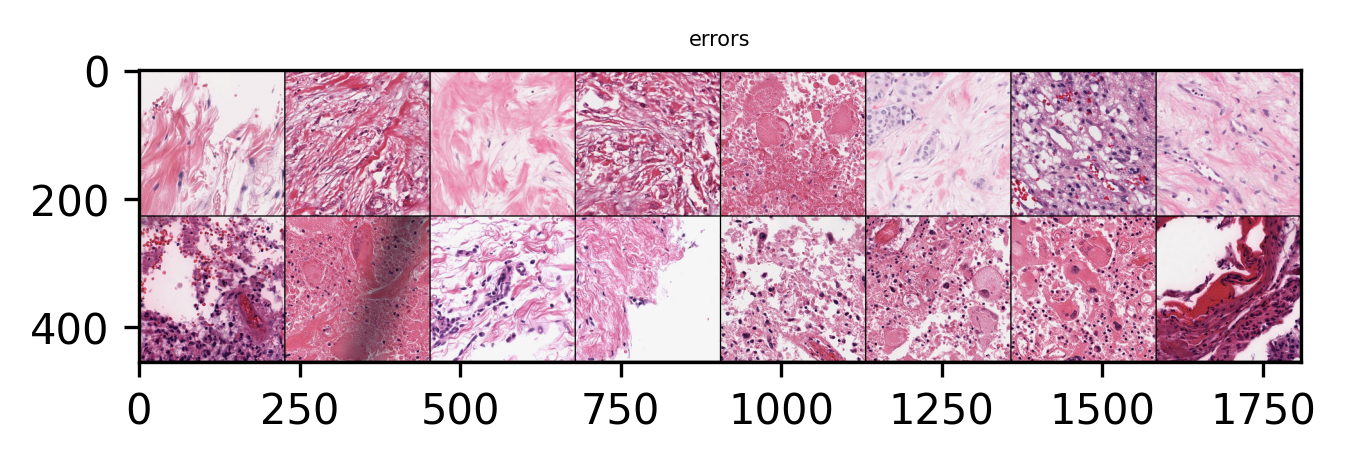

In [369]:
out = torchvision.utils.make_grid(error_list, nrow=8)

imshow(out, title='errors')


In [370]:
val_dist = kmeans.transform(val_data)
errors_dist = val_dist[true == pred]

* lets look at the relative distance of each data point to each of the KMeans centers:

In [371]:
error_ratio = errors_dist[:,0] / errors_dist[:,1]
error_ratio = np.reciprocal(error_ratio, where=error_ratio>1)
print('error statistics:')
print('mean distance ratio from centers: ', error_ratio.mean())
print('min ratio: ', error_ratio.min())

error statistics:
mean distance ratio from centers:  0.9579470209330562
min ratio:  0.8581414746426594


In [372]:
correct_dist = val_dist[true != pred]
correct_ratio = correct_dist[:,0] / correct_dist[:,1]
correct_ratio = np.reciprocal(correct_ratio, where=correct_ratio>1)
print('correct statistice:')
print('mean distance ratio from centers: ', correct_ratio.mean())
print('min ratio: ', correct_ratio.min())

correct statistice:
mean distance ratio from centers:  0.8847789752281773
min ratio:  0.594888206285881


* we can see that the classification errors have a smaller ratio of distance between the two centers (of kmeans). We also see some of the images might be partially corrupted (making their classification a matter of chance).
* on the other hand, we see that also correct clasiffications dont have an excellent ratio on average.

to improve these points, we might try:
* removing outliers (might help get better kmeans centers)
* we can try PCA prior to KMeans to reduce dimenssionality (in higher dimensions euclidian distance regress to the mean)
* we might try a different clustering algorithem (e.g. DBScan) or use a different CNN (e.g. Xception, that takes higher resolution images)
* we might want to partially train the network on a similar task that either has enough data available, or one that doesnt require lots of data (e.g. contrastive learning)

Ultimately, we might want to develop a model that gives classifications based on multiple images of the same toumor sample, thus circumventing the need for extreamly high accuracy on a single image.

# try PCA

In [393]:
pca = PCA(n_components=10).fit(data)
reduced_data = pca.transform(data)
kmeans_reduced = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(reduced_data)
reduced_val_data = pca.transform(val_data)
reduced_prediction = kmeans_reduced.predict(reduced_val_data)
confusion_matrix(true, np.logical_not(reduced_prediction))

array([[47,  3],
       [ 9, 41]], dtype=int64)

In [394]:
val_dist = kmeans_reduced.transform(reduced_val_data)
errors_dist = val_dist[true == pred]

In [395]:
error_ratio = errors_dist[:,0] / errors_dist[:,1]
error_ratio = np.reciprocal(error_ratio, where=error_ratio>1)
print('error statistics:')
print('mean distance ratio from centers: ', error_ratio.mean())
print('min ratio: ', error_ratio.min())

error statistics:
mean distance ratio from centers:  0.8781919420826524
min ratio:  0.7107500509362717


In [396]:
correct_dist = val_dist[true != pred]
correct_ratio = correct_dist[:,0] / correct_dist[:,1]
correct_ratio = np.reciprocal(correct_ratio, where=correct_ratio>1)
print('correct statistice:')
print('mean distance ratio from centers: ', correct_ratio.mean())
print('min ratio: ', correct_ratio.min())

correct statistice:
mean distance ratio from centers:  0.7488162153484054
min ratio:  0.3509145572410438


# we see some improvement in terms of cluster separation, that is also translated into higher accuracy. We need to determine the true cause of the error - misslabel or corrupted image, or on the other hand something related to the shortcomings of the model  

In [398]:
train_pred = np.logical_not(kmeans_reduced.predict(reduced_data)).astype(int)

In [400]:
train_pred.shape

(2000,)

In [399]:
train_pred

array([0, 0, 0, ..., 0, 0, 1])

'3ee44bc8-180f-415c-b8d0-d63e05b33869.jpg'

In [414]:

out = pd.DataFrame(train_pred, index=[t[0] for t in file_names])
out.columns = ['predicted_label']
out.to_csv('C:/Projects/pangea-home-assignment/train_prediction.csv')

In [415]:
out

predicted_label
107dc743-ed36-4326-bf48-e453a121dc1c.jpg                0
3ee44bc8-180f-415c-b8d0-d63e05b33869.jpg                0
341648e5-710d-45a5-9e71-932aa139e8fa.jpg                0
9f2b7ab7-a140-48ba-906a-a057f6000183.jpg                1
f53b1f65-c6f8-4131-b836-8b6b25f7802a.jpg                1
...                                                   ...
86410c5e-57de-4603-8c70-1112d35e6711.jpg                0
95019466-4406-4569-a81b-3c41980043f2.jpg                1
111eee61-7720-4d31-9062-aeb097bf5036.jpg                0
ce093889-f8f2-4bfe-b582-3a16fe0c8686.jpg                0
662165ee-cbf5-46e2-a228-954d3d2ea8b6.jpg                1

[2000 rows x 1 columns]

# other methods to discussion:
* interesting options to explore include outlier removal using DBScan, using other layers of the CNN (maybe more than one), CNN fine tuning on a similar dataset (also manually labeling a few hundred slides by a doctor). We might also try using a different CNN with desired features such as: higher resolution input and rotation invariance (uniquely suitable for our case).
* one common method that might be a bit tricky in this case is contrastive learning, where each data point is augmented using different transformations, and then used by demanding closer features for versions of the same image, and farther features for images originating from different photos. this might be problematic, as we (non-oncologists) dont really know which transformation can a picture go through, while still holding the same meaning for diagnosis.
for example a gray scale transformation might make it impossible for a doctor to determine the toumor type (and image class). on the other hand, some transformations such as rotation are probably safe. In any case, this approach might be useful for model fine tuning.